In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os as os

In [2]:
#creating a function that converts 64-bit to 32-bit nums
def size64_to_size32(df):
    """
    It converts all 64-bit floats and integers to 32-bit
    """
    for c in df.columns:
        if df[c].dtypes == 'int64':
            df[c] = df[c].astype(np.int32)
        if df[c].dtypes == 'float64':
            df[c] = df[c].astype(np.float32)
            


In [3]:

departments = pd.read_csv('./data/instacart/departments.csv')
orders = pd.read_csv('./data/instacart/orders.csv')
aisles = pd.read_csv('./data/instacart/aisles.csv')
products = pd.read_csv('./data/instacart/products.csv')
order_products_prior = pd.read_csv('./data/instacart/order_products__prior.csv')
order_products_train = pd.read_csv('./data/instacart/order_products__train.csv')

In [4]:
size64_to_size32(departments)
size64_to_size32(orders)
size64_to_size32(aisles)
size64_to_size32(products)
size64_to_size32(order_products_prior)
size64_to_size32(order_products_train)

In [5]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
products_and_aisle= pd.merge(products, aisles, on='aisle_id', how='left')


In [9]:
products_complete = pd.merge(products_and_aisle, departments, on='department_id', how='left')
products_complete.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [10]:
products_complete.drop(columns=['aisle_id', 'department_id'], inplace=True)
products_complete.head()

,product_id,product_name,aisle,department
0,1,Chocolate Sandwich Cookies,cookies cakes,snacks
1,2,All-Seasons Salt,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,frozen meals,frozen
4,5,Green Chile Anytime Sauce,marinades meat preparation,pantry


In [11]:

orders_record_train = orders.loc[orders['eval_set'] == 'train'].copy()
orders_record_prior = orders.loc[orders['eval_set'] == 'prior'].copy()

In [12]:
orders_record_train.isna().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [13]:
orders_record_prior.isna().sum()


order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [14]:

display(orders_record_prior.head())
display(order_products_prior.head())

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [15]:
orders_record_prior['days_since_prior_order'].fillna(0, inplace=True)


/tmp/ipykernel_5408/702824569.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_record_prior['days_since_prior_order'].fillna(0, inplace=True)


In [16]:
orders_complete_prior = pd.merge(orders_record_prior,order_products_prior, on='order_id', how='left')

In [17]:
orders_complete_prior= pd.merge(orders_complete_prior, products_complete, on='product_id', how='left')
orders_complete_prior.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle,department
0,2539329,1,prior,1,2,8,0.0,196,1,0,Soda,soft drinks,beverages
1,2539329,1,prior,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,soy lactosefree,dairy eggs
2,2539329,1,prior,1,2,8,0.0,12427,3,0,Original Beef Jerky,popcorn jerky,snacks
3,2539329,1,prior,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,popcorn jerky,snacks
4,2539329,1,prior,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,paper goods,household


In [18]:
orders_complete_train = pd.merge(orders_record_train,order_products_train, on='order_id', how='left')
orders_complete_train= pd.merge(orders_complete_train, products_complete, on='product_id', how='left')

In [19]:
orders_complete_prior.columns
orders_complete_prior.dtypes
## days_since_prior_order is float64, need to convert to int64

order_id                    int32
user_id                     int32
eval_set                   object
order_number                int32
order_dow                   int32
order_hour_of_day           int32
days_since_prior_order    float32
product_id                  int32
add_to_cart_order           int32
reordered                   int32
product_name               object
aisle                      object
department                 object
dtype: object

In [20]:
orders_complete_prior['days_since_prior_order'] = orders_complete_prior['days_since_prior_order'].astype('int64')
orders_complete_prior.dtypes

order_id                   int32
user_id                    int32
eval_set                  object
order_number               int32
order_dow                  int32
order_hour_of_day          int32
days_since_prior_order     int64
product_id                 int32
add_to_cart_order          int32
reordered                  int32
product_name              object
aisle                     object
department                object
dtype: object

In [21]:
orders_complete_prior.drop(columns=['eval_set', 'product_id', 'add_to_cart_order'], inplace=True   )


In [22]:
orders_complete_prior.describe()


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,1.029372e+05,1.714205e+01,2.738818e+00,1.342498e+01,1.039264e+01,5.896975e-01
std,9.873007e+05,5.946648e+04,1.753504e+01,2.090049e+00,4.246365e+00,8.917691e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.559430e+05,5.142100e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,0.000000e+00
50%,1.711048e+06,1.026110e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00,1.000000e+00
75%,2.565514e+06,1.543910e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.000000e+00
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.000000e+00


In [23]:
## i confused myself about the meaning of train and prior. I think prior is the data that we use to train the model, and train is the data that we use to test the model. So I will use prior data to train the model, and train data to test the model.

#  Business Case Data Analysis
## 3.1 What is the structure of our data?

In [24]:
import seaborn as sns

Text(0, 0.5, 'Count(millions)')

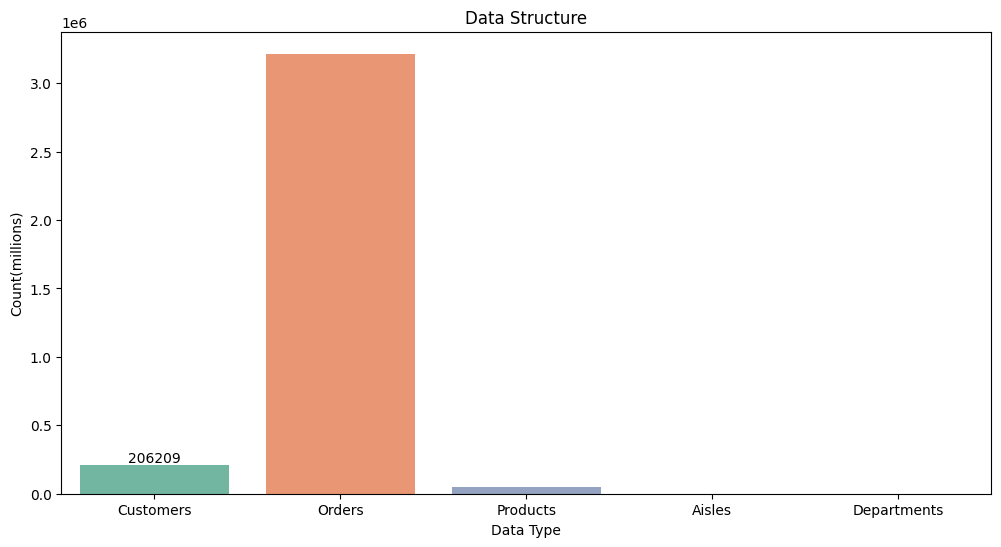

In [25]:

data = {
        'Customers': len(orders_complete_prior['user_id'].unique()),
        'Orders': len(order_products_prior['order_id'].unique()),
        'Products': len(products_complete['product_id'].unique()),
        'Aisles': len(aisles['aisle_id'].unique()),
        'Departments': len(departments['department_id'].unique())
        }
data_structure = pd.DataFrame(data, index=[0])

plt.figure(figsize=(12,6))
ax = sns.barplot(data = data_structure, palette = 'Set2')
ax.bar_label(ax.containers[0])
plt.title('Data Structure')
plt.xlabel('Data Type')
plt.ylabel('Count(millions)')


<h4>When do people place their orders? </h4>

In dow i noticed a tendency that users place orders mostly in Sundays and Mondays, and then it normalizes. I assume is due users getting their groceries in the beginning of the week.

Similar pattern with  a outlier in day 7, there is a downward tendency from early days in the month to  another outlier in day 30, perhaps due 30 days months.


/tmp/ipykernel_5408/2688687377.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_dow_counts.index, y=order_dow_counts.values, palette='Set3')


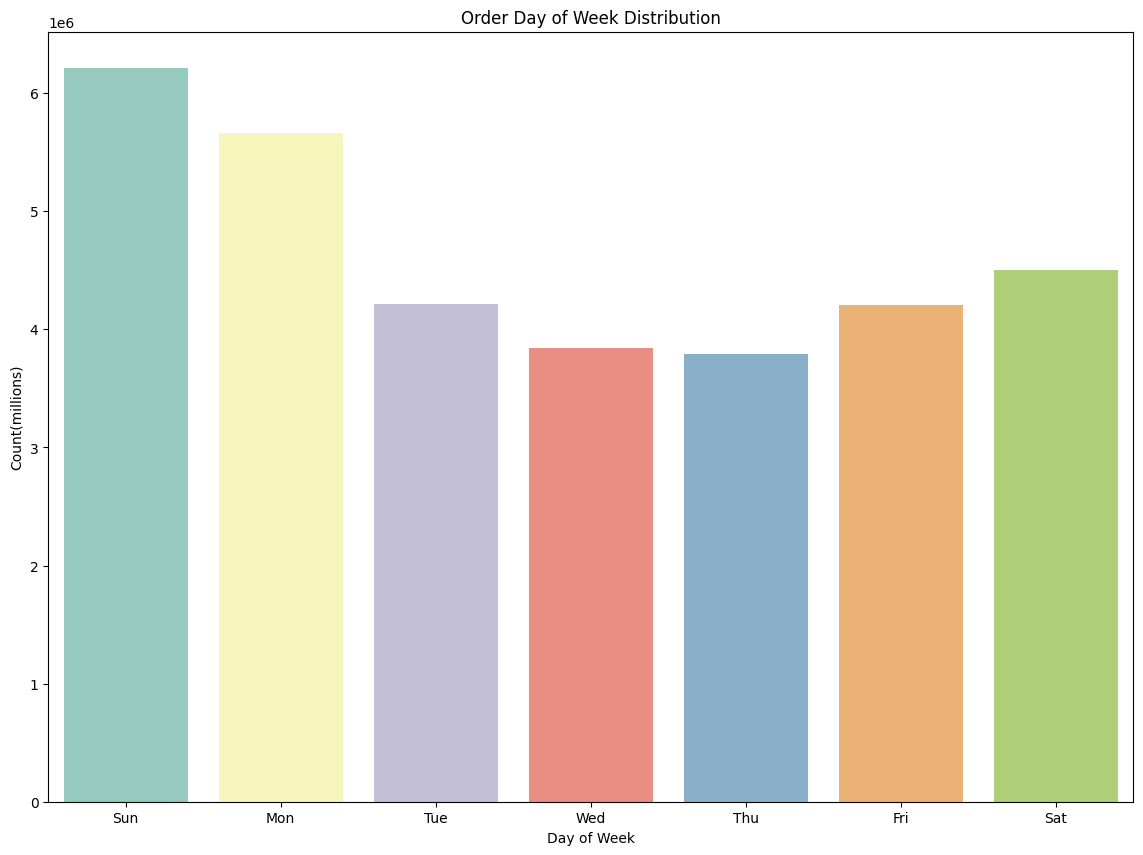

In [58]:

order_dow_counts = orders_complete_prior['order_dow'].value_counts().sort_index()

plt.figure(figsize=(14,10))
sns.barplot(x=order_dow_counts.index, y=order_dow_counts.values, palette='Set3')
plt.title('Order Day of Week Distribution')
plt.xlabel('Day of Week')
plt.ylabel('Count(millions)')
plt.xticks(range(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.show()


In [49]:
orders_days_freq =orders['days_since_prior_order'].value_counts().sort_index()

/tmp/ipykernel_5408/348802634.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(orders_days_freq ,palette = 'Set3')


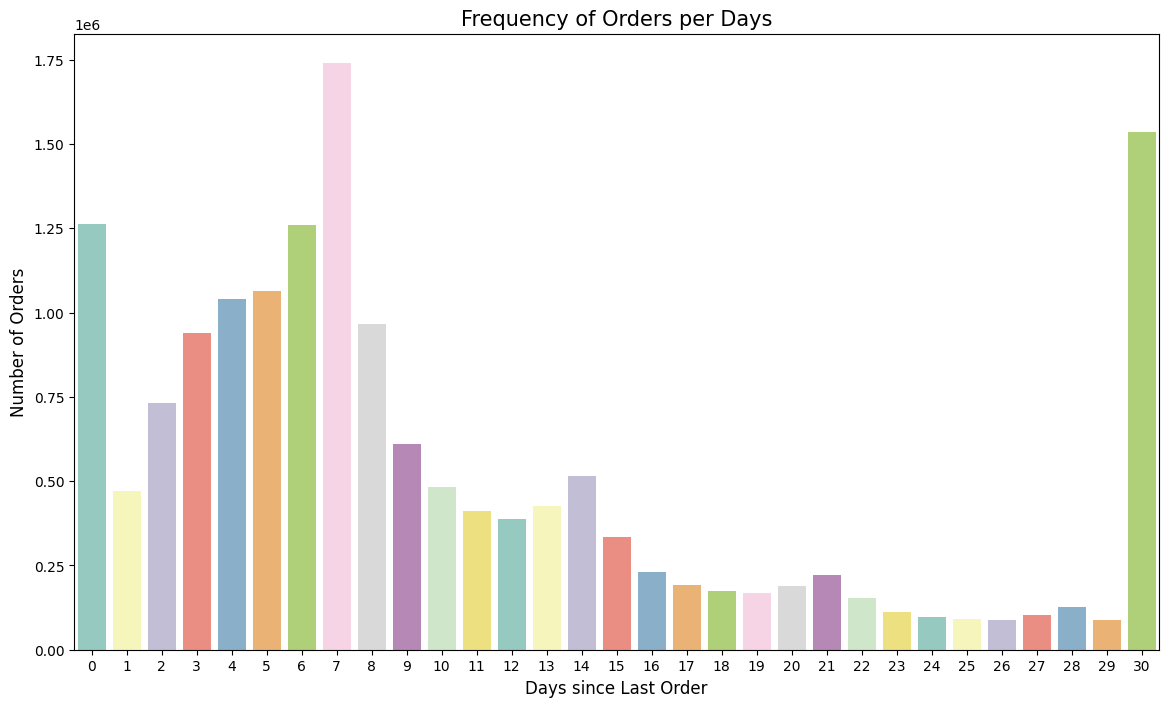

In [ ]:
plt.figure(figsize=(14,8))

sns.barplot(orders_days_freq ,palette = 'Set3')
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Days since Last Order', fontsize=12)
plt.title('Frequency of Re-orders per Days', fontsize=15)
plt.show();

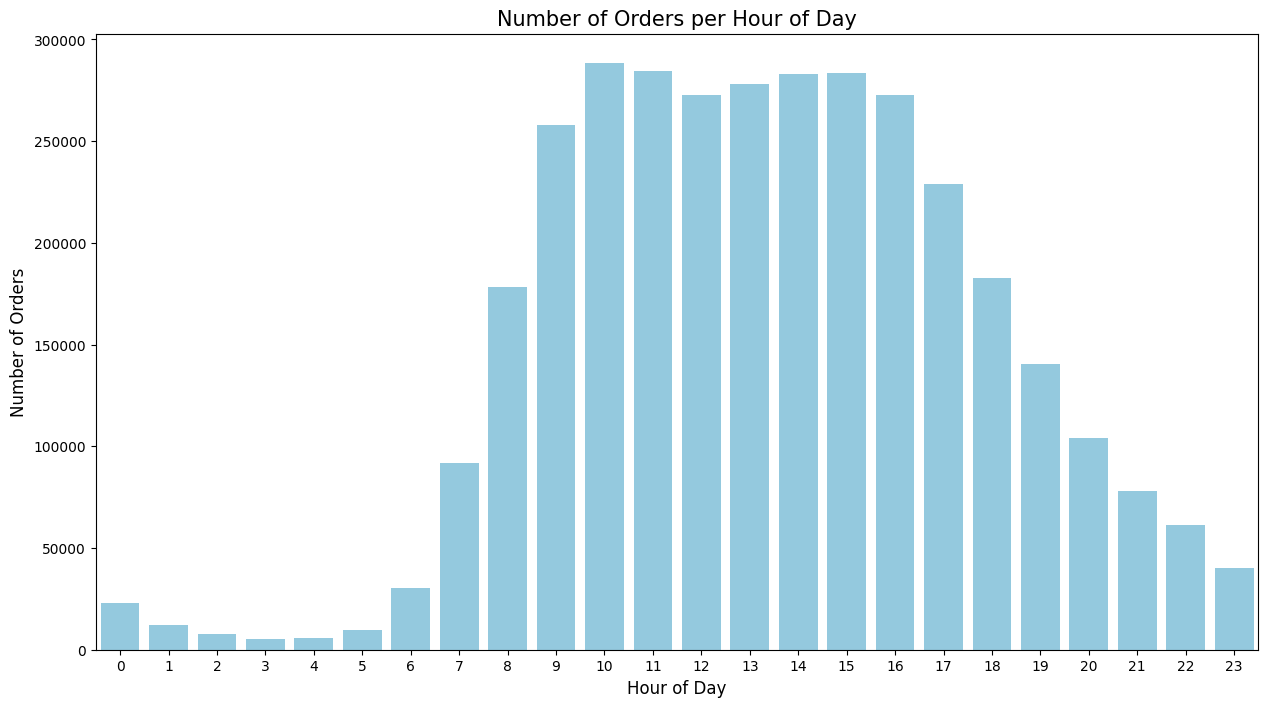

In [ ]:



hourly_counts = orders['order_hour_of_day'].value_counts().sort_index()


plt.figure(figsize=(15,8))

sns.barplot(x=hourly_counts.index, y=hourly_counts.values, color='skyblue')
sns.color_palette("husl", 8)
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Hour of Day', fontsize=12)
plt.title('Number of Orders per Hour of Day', fontsize=15)
plt.show()

In [29]:
import gc 

gc.collect()

del products_complete
%who_ls

['aisles',
 'ax',
 'data',
 'data_structure',
 'departments',
 'gc',
 'hourly_counts',
 'np',
 'order_products_prior',
 'order_products_train',
 'orders',
 'orders_complete_prior',
 'orders_complete_train',
 'orders_record_prior',
 'orders_record_train',
 'os',
 'pd',
 'plt',
 'products',
 'products_and_aisle',
 'size64_to_size32',
 'sns']

<h3> Which products are frequently ordered? </h3>

In [30]:
orders =orders_complete_prior.sample(frac=0.5)
#to simplify the dataset, we will use 50% of the data

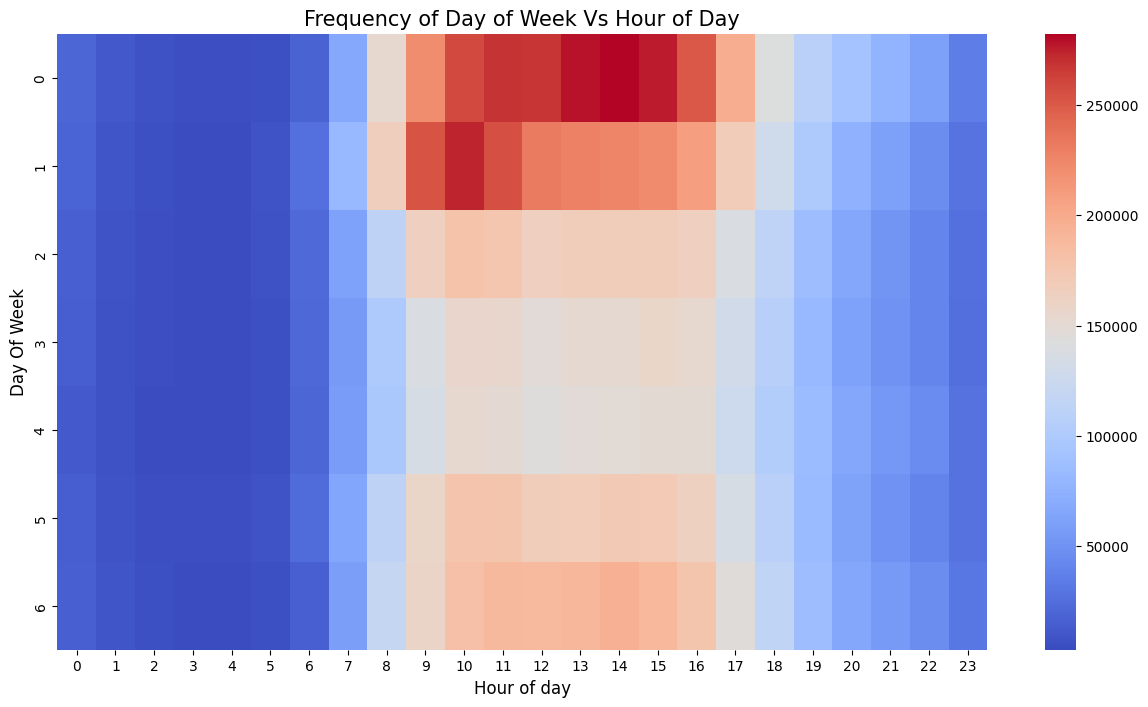

In [31]:
days_hours = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
days_hours = days_hours.pivot(index='order_dow', columns='order_hour_of_day', values='order_number')

plt.figure(figsize=(15,8))
sns.heatmap(days_hours, cmap='coolwarm')
plt.title('Frequency of Day of Week Vs Hour of Day', fontsize=15)
plt.ylabel('Day Of Week', fontsize = 12)
plt.xlabel('Hour of day', fontsize = 12)
plt.show()


how many orders are there per costumers

In [32]:
orders.groupby('user_id')['order_id'].nunique().describe()


count    206092.000000
mean         14.732959
std          15.909823
min           1.000000
25%           5.000000
50%           9.000000
75%          18.000000
max          99.000000
Name: order_id, dtype: float64

/tmp/ipykernel_5408/836253910.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(orders.groupby('user_id')['order_id'].nunique(), binwidth=3, kde = True, palette = 'Set2')


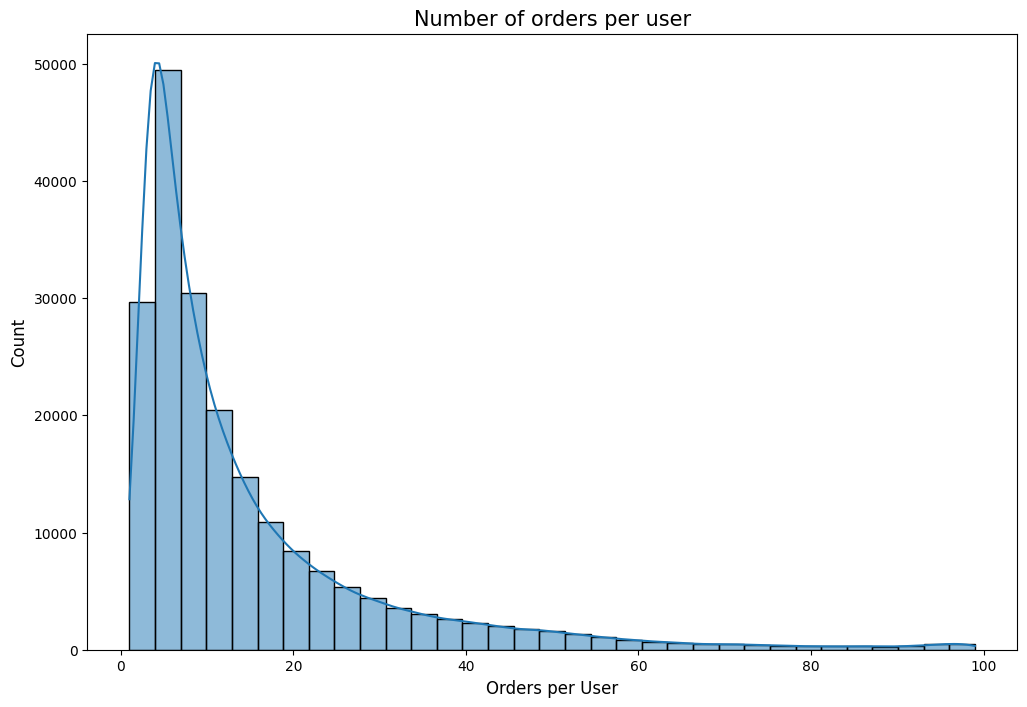

In [33]:
plt.figure(figsize=(12,8))
sns.histplot(orders.groupby('user_id')['order_id'].nunique(), binwidth=3, kde = True, palette = 'Set2')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Orders per User', fontsize=12)
plt.title('Number of orders per user', fontsize=15)
plt.show();

how often do customers reorder?

considering the last graph we noticed that customers tend to reorder more every 7 days, or in a weekly basis



In [34]:
import gc
gc.collect()

size64_to_size32(orders)

In [35]:
orders.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'reordered', 'product_name', 'aisle',
       'department'],
      dtype='object')